In [1]:
import statsmodels.tools.eval_measures as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../03_kpi/data/dc_bikes_with_features_formatted_daytime.csv", parse_dates=['datetime'], index_col=0)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,part_of_day
datetime,,,,,,,,,,,,,,,,,
01-01-2011 00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,2011,1,1,0,0,night
01-01-2011 01:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,2011,1,1,1,0,night
01-01-2011 02:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2011,1,1,2,0,night
01-01-2011 03:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,2011,1,1,3,0,night
01-01-2011 04:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,2011,1,1,4,0,night


In [3]:
subset_df = df[['temp', 'atemp', 'humidity', 'windspeed', 'count']]

### Heatmap for highest correlation with the count column

In [4]:
correlation_matrix = subset_df.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

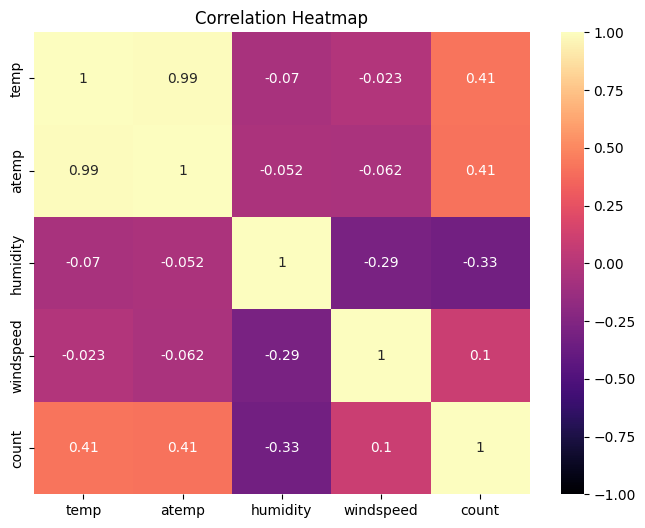

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

### Linear regression model with count and highest corr. feature (atemp) 

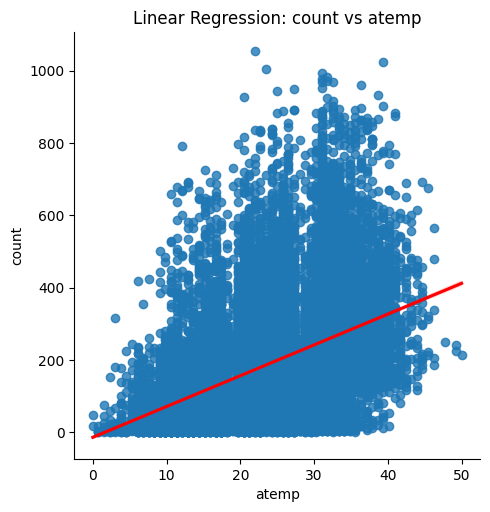

In [6]:
sns.lmplot(data=df, x='atemp', y='count', line_kws={'color': 'red'})
plt.title('Linear Regression: count vs atemp')
plt.xlabel('atemp')
plt.ylabel('count')
plt.show()

### Calculating R2

In [7]:
sm.rmse(subset_df['count'], subset_df['atemp'])

239.85254748720615

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [9]:
X = subset_df[['atemp']]
y = subset_df['count']

In [11]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [12]:
r2 = r2_score(y, y_pred)
r2

0.16962402146163136

### Calculate R2 with additional features

In [13]:
additional_feature = 'humidity'
X = subset_df[['atemp', additional_feature]]

In [14]:
model.fit(X, y)
y_pred = model.predict(X)

In [15]:
r2 = r2_score(y, y_pred)
r2

0.26488781770724645

In [16]:
X = subset_df[['atemp', additional_feature, 'windspeed', 'temp']]

In [35]:
# there is no point to add 'temp' as it correlates 'count' exactly as 'atemp'

In [17]:
model.fit(X, y)
y_pred = model.predict(X)

In [18]:
r2 = r2_score(y, y_pred)
r2

0.26626505184252514

### Conclusion
In order to improve the fit of the mode, additional features (like weather conditions and holiday factor) should be added. More features - better result. 

In [30]:
X = df[['atemp', additional_feature, 'windspeed', 'temp', 'season', 'holiday', 'workingday', 'weather','humidity', 
        'year', 'month', 'day', 'hour', 'minute']]

In [31]:
model.fit(X, y)
y_pred = model.predict(X)

In [32]:
r2 = r2_score(y, y_pred)
r2

0.37839926659123724